<h1><center>Entrega 2</h1>

# Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Preguntas


- Pregunta 1: **¿Existen combinaciones de apps que se descargan juntas? Ya que si ciertas apps se descargan juntas podemos estar frente a un “ecosistema digital”**


- Pregunta 2: **¿Influye el rating de las aplicaciones con las descargas de estas? Porque esto ayuda al entendimiento de la confianza digital y las decisiones de descargas de los usuarios.**

- Pregunta 3: **¿Existen días donde los usuarios tiendan a usar más una aplicacion que otra? Aquí podemos identificar diferentes patrones.** Esta en analisis_datos_T
 
- Pregunta 4: **¿Qué tipo de usuarios tienden a usar ciertas categorías de apps? Con esto, se puede mejorar el enfoque de las aplicaciones o las estrategias de marketing** Esta en analis_datos_T

# Cargar archivos

In [2]:
play_store = pd.read_csv('apps.csv')
play_store_user = pd.read_csv('user.csv')
mbr = pd.read_csv('archivos_limpios\mbr.csv')

In [3]:
play_store.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,0,0.0,0,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,0,0.0,0,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,0,0.0,0,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,0,0.0,1,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,0,0.0,0,Art & Design;Creativity



`play_store` contiene **información técnica, comercial y de clasificación sobre las aplicaciones de la Play Store**

* **App**: Nombre de la aplicacion.
* **Category**: Categoría general a la que pertenece la aplicacion (*Tools*, *Game*, *Education*).
* **Rating**: Calificación promedio otorgada por los usuarios (1 a 5).
* **Reviews**: Numero total de reseñas recibidas por la aplicacion.
* **Installs**: Numero de instalaciones de la aplicacion registradas.
* **Price**: Precio de la aplicacion.
* **Content Rating**: Clasificación por edad del contenido de la aplicacion (*Everyone*, *Teen*, *Mature 17+*).
* **Genres**: Generos a los que pertenece la aplicacion.

In [4]:
play_store_user.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,1,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,1,0.25,0.288462
2,10 Best Foods for You,Works great especially going grocery store,1,0.40,0.875000
3,10 Best Foods for You,Best idea us,1,1.00,0.300000
4,10 Best Foods for You,Best way,1,1.00,0.300000


`play_store_user` contiene **reseñas de usuarios sobre distintas aplicaciones de la Play Store**

* **App**: Nombre de la aplicacion a la que corresponde la reseña del usuario.
* **Translated_Review**: Texto de la reseña del usuario.
* **Sentiment**: Clasificacion general en la reseña. Puede ser *Positive*, *Neutral* o *Negative*.
* **Sentiment_Polarity**: Numero del sentimiento, donde -1  sentimiento muy negativo y 1  positivo.
* **Sentiment_Subjectivity**: Numero de cuan subjetiva es la reseña, donde 0 indica hechos y 1 opiniones personales.

In [5]:
mbr.head()

,app_package,review,rating,votes,uid,formated_date,app_category
0,com.cleverapps.heroes,It's really a fun game,5,1,shqoc6X1fcJRLEmx,2018-10-21,Casual
1,com.bodyfast,uninstalling. it was ok but felt like it was c...,2,0,shqoc6X1fcJRLEmx,2019-01-18,Health & Fitness
2,com.thrivegames.wordshapes,Love this game,4,1,shqoc6X1fcJRLEmx,2021-01-16,Word
3,com.affinity.rewarded_play,Doesn't update play time. Just downloaded it 3...,1,1,shqoc6X1fcJRLEmx,2021-11-04,Entertainment
4,dating.inmessage.net,app crashes every time I try to log in. what g...,1,0,shqoc6X1fcJRLEmx,2021-11-24,Dating


`mbr`contiene **registros individuales de evaluaciones hechas por usuarios a diferentes aplicaciones**

* **app_package**: Identificador del paquete de la aplicacion (nombre del archivo de la app en Play Store).
* **review**: La reseña del usuario
* **rating**: Calificación otorgada por el usuario a la aplicacion escala de 1 a 5 estrellas.
* **votes**: Número de votos o interacciones que ha recibido esa evaluacion
* **uid**: Identificador unico del usuario que emitió la evaluación.
* **formated_date**: Fecha en que se realizó la evaluación, en formato de texto.
* **app_category**: Categoría a la que pertenece la aplicacion (*Social*, *Productivity*, *Games*).


# Merge

In [6]:
df_merge_store = pd.merge(play_store, play_store_user, on='App', how='inner')

### Las categorias son

In [7]:
df_merge_store["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [8]:
print("Categorías únicas de apps:")
print(mbr['app_category'].unique())

Categorías únicas de apps:
['Casual' 'Health & Fitness' 'Word' 'Entertainment' 'Dating' 'Shopping'
 'Education' 'Business' 'Libraries & Demo' 'Weather' 'Puzzle'
 'Personalization' 'Simulation' 'Maps & Navigation' 'Action'
 'Role Playing' 'Productivity' 'Sports' 'Communication' 'Tools' 'Beauty'
 'Educational' 'Photography' 'Board' 'Music & Audio' 'Finance'
 'Books & Reference' 'Lifestyle' 'Strategy' 'Racing' 'Trivia' 'Parenting'
 'Arcade' 'Adventure' 'Travel & Local' 'Card' 'Casino'
 'Video Players & Editors' 'Food & Drink' 'Medical' 'Comics'
 'News & Magazines' 'Music' 'Social' 'Events' 'Art & Design'
 'House & Home' 'Auto & Vehicles']


### Acortar categorias

In [9]:
# Diccionario para agrupar categorías


# Play Store categories to a more general category
category_mapping = {
    'ART_AND_DESIGN': 'Art',
    'AUTO_AND_VEHICLES': 'Auto',
    'BEAUTY': 'Lifestyle',
    'BOOKS_AND_REFERENCE': 'Books',
    'BUSINESS': 'Business',
    'COMICS': 'Entertainment',
    'COMMUNICATION': 'Communication',
    'DATING': 'Social',
    'EDUCATION': 'Education',
    'ENTERTAINMENT': 'Entertainment',
    'EVENTS': 'Lifestyle',
    'FINANCE': 'Finance',
    'FOOD_AND_DRINK': 'Food',
    'HEALTH_AND_FITNESS': 'Health',
    'HOUSE_AND_HOME': 'Lifestyle',
    'LIBRARIES_AND_DEMO': 'Tools',
    'LIFESTYLE': 'Lifestyle',
    'GAME': 'Games',
    'FAMILY': 'Games',
    'MEDICAL': 'Health',
    'SOCIAL': 'Social',
    'SHOPPING': 'Shopping',
    'PHOTOGRAPHY': 'Photography',
    'SPORTS': 'Sports',
    'TRAVEL_AND_LOCAL': 'Travel',
    'TOOLS': 'Tools',
    'PERSONALIZATION': 'Tools',
    'PRODUCTIVITY': 'Productivity',
    'PARENTING': 'Family',
    'WEATHER': 'Weather',
    'VIDEO_PLAYERS': 'Entertainment',
    'NEWS_AND_MAGAZINES': 'News',
    'MAPS_AND_NAVIGATION': 'Travel',
}

# mbr categories to a more general category
mbr_to_play_mapping = {
    'Casual': 'Games',
    'Health & Fitness': 'Health',
    'Word': 'Games',
    'Entertainment': 'Entertainment',
    'Dating': 'Social',
    'Shopping': 'Shopping',
    'Education': 'Education',
    'Business': 'Business',
    'Libraries & Demo': 'Tools',
    'Weather': 'Weather',
    'Puzzle': 'Games',
    'Personalization': 'Tools',
    'Simulation': 'Games',
    'Maps & Navigation': 'Travel',
    'Action': 'Games',
    'Role Playing': 'Games',
    'Productivity': 'Productivity',
    'Sports': 'Sports',
    'Communication': 'Communication',
    'Tools': 'Tools',
    'Beauty': 'Lifestyle',
    'Educational': 'Education',
    'Photography': 'Photography',
    'Board': 'Games',
    'Music & Audio': 'Entertainment',
    'Finance': 'Finance',
    'Books & Reference': 'Books',
    'Lifestyle': 'Lifestyle',
    'Strategy': 'Games',
    'Racing': 'Games',
    'Trivia': 'Games',
    'Parenting': 'Family',
    'Arcade': 'Games',
    'Adventure': 'Games',
    'Travel & Local': 'Travel',
    'Card': 'Games',
    'Casino': 'Games',
    'Video Players & Editors': 'Entertainment',
    'Food & Drink': 'Food',
    'Medical': 'Health',
    'Comics': 'Entertainment',
    'News & Magazines': 'News',
    'Music': 'Entertainment',
    'Social': 'Social',
    'Events': 'Lifestyle',
    'Art & Design': 'Art',
    'House & Home': 'Lifestyle',
    'Auto & Vehicles': 'Auto'
}




In [10]:
mbr['Category_Reduced'] = mbr['app_category'].map(mbr_to_play_mapping).fillna('Other')
mbr["Category_Reduced"].unique()

array(['Games', 'Health', 'Entertainment', 'Social', 'Shopping',
       'Education', 'Business', 'Tools', 'Weather', 'Travel',
       'Productivity', 'Sports', 'Communication', 'Lifestyle',
       'Photography', 'Finance', 'Books', 'Family', 'Food', 'News', 'Art',
       'Auto'], dtype=object)

In [11]:
df_merge_store['Category_Reduced'] = df_merge_store['Category'].map(category_mapping).fillna('Other')
df_merge_store["Category_Reduced"].unique()


array(['Art', 'Auto', 'Lifestyle', 'Books', 'Business', 'Entertainment',
       'Communication', 'Social', 'Education', 'Finance', 'Food',
       'Health', 'Tools', 'Games', 'Shopping', 'Photography', 'Sports',
       'Travel', 'Productivity', 'Family', 'Weather', 'News'],
      dtype=object)

# Graficos

### mbr

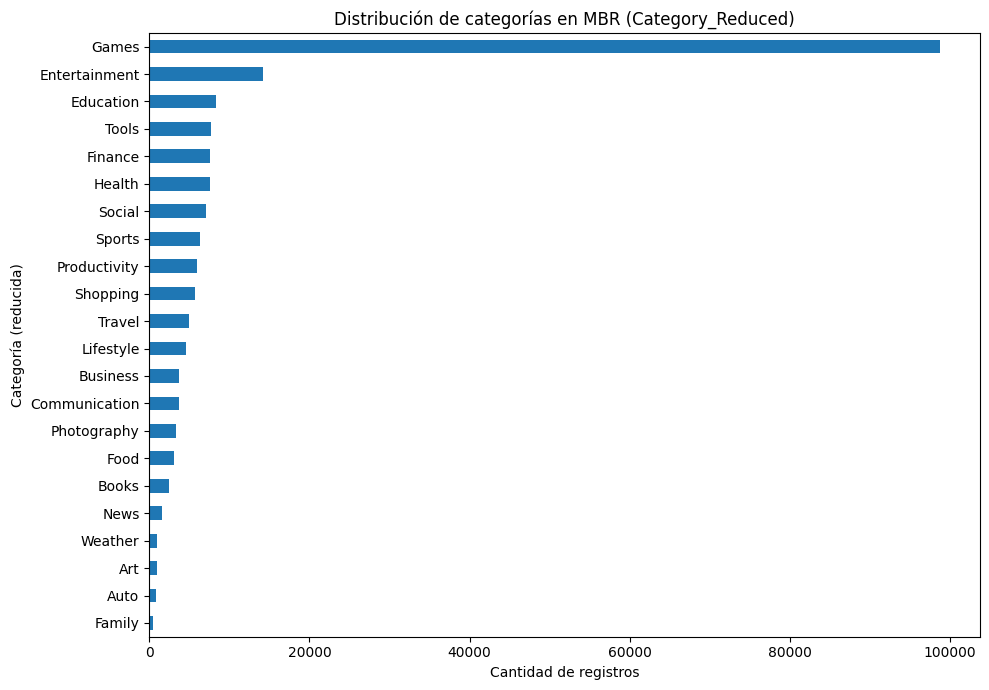

In [12]:

# Contar cuántas veces aparece cada categoría
categoria_counts = mbr['Category_Reduced'].value_counts().sort_values(ascending=True)

# Crear gráfico de barras horizontales
plt.figure(figsize=(10, 7))
categoria_counts.plot(kind='barh')

plt.xlabel("Cantidad de registros")
plt.ylabel("Categoría (reducida)")
plt.title("Distribución de categorías en MBR (Category_Reduced)")
plt.tight_layout()
plt.show()


### df_merge_store

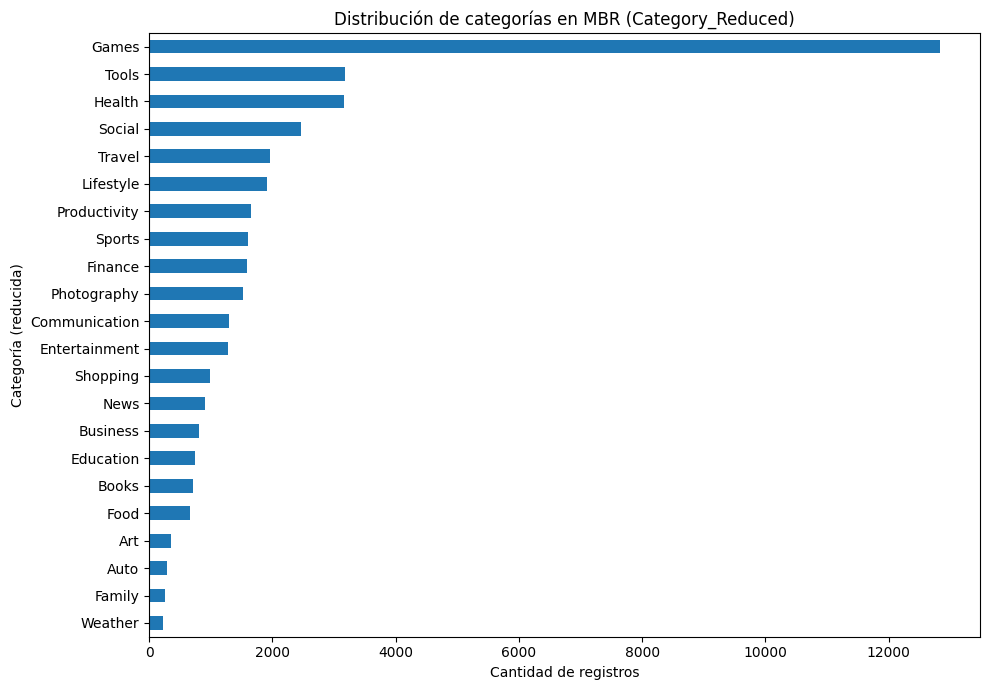

In [13]:
# Contar cuántas veces aparece cada categoría
categoria_counts = df_merge_store['Category_Reduced'].value_counts().sort_values(ascending=True)

# Crear gráfico de barras horizontales
plt.figure(figsize=(10, 7))
categoria_counts.plot(kind='barh')

plt.xlabel("Cantidad de registros")
plt.ylabel("Categoría (reducida)")
plt.title("Distribución de categorías en MBR (Category_Reduced)")
plt.tight_layout()
plt.show()


In [14]:
# guardar archivo
df_merge_store.to_csv('archivos_limpios/df_merge_store.csv', index=False)

# Pregunta 1: ¿Existen combinaciones de apps que se descargan juntas? Ya que si ciertas apps se descargan juntas podemos estar frente a un “ecosistema digital”
 

In [21]:
df_merge_store['Translated_Review'].value_counts().head(10)


Translated_Review
Good         156
Nice         117
Great        104
Love          95
Awesome       67
I love        64
Very good     52
I like        47
good          41
Cool          40
Name: count, dtype: int64

In [23]:
mbr.head()

,app_package,review,rating,votes,uid,formated_date,app_category,Category_Reduced
0,com.cleverapps.heroes,It's really a fun game,5,1,shqoc6X1fcJRLEmx,2018-10-21,Casual,Games
1,com.bodyfast,uninstalling. it was ok but felt like it was c...,2,0,shqoc6X1fcJRLEmx,2019-01-18,Health & Fitness,Health
2,com.thrivegames.wordshapes,Love this game,4,1,shqoc6X1fcJRLEmx,2021-01-16,Word,Games
3,com.affinity.rewarded_play,Doesn't update play time. Just downloaded it 3...,1,1,shqoc6X1fcJRLEmx,2021-11-04,Entertainment,Entertainment
4,dating.inmessage.net,app crashes every time I try to log in. what g...,1,0,shqoc6X1fcJRLEmx,2021-11-24,Dating,Social


In [22]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Paso 1: Agrupar apps por 'Translated_Review' como si fuera un proxy de usuario
agrupadas = mbr.groupby('Translated_Review')['App'].unique()

# Paso 2: Convertir a lista de listas
transacciones = agrupadas.tolist()

# Paso 3: Transformar a formato binario para Apriori
te = TransactionEncoder()
te_ary = te.fit(transacciones).transform(transacciones)
df_apriori = pd.DataFrame(te_ary, columns=te.columns_)

# Paso 4: Aplicar Apriori
frequent_itemsets = apriori(df_apriori, min_support=0.005, use_colnames=True)
print(frequent_itemsets.head())

# Paso 5: Reglas de asociación
reglas = association_rules(frequent_itemsets, metric="lift", min_threshold=1.1)

# Mostrar reglas más fuertes
reglas_ordenadas = reglas.sort_values(by="lift", ascending=False)


KeyError: 'Translated_Review'

# Pregunta 2:  ¿Influye el rating de las aplicaciones con las descargas de estas? Porque esto ayuda al entendimiento de la confianza digital y las decisiones de descargas de los usuarios.


clustering y correlacion y 